<a href="https://colab.research.google.com/github/gabrielwithappy/Python_study/blob/main/huggingface_chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import subprocess
import sys
import os
from pathlib import Path

ROOT = Path('/content/drive/MyDrive/20.Projects/huggingface/')
%cd '/content/drive/MyDrive/20.Projects/huggingface/'

/content/drive/MyDrive/20.Projects/huggingface


In [3]:
import subprocess

%cd '/content/drive/MyDrive/20.Projects/huggingface/'
cmd = ['python', '-m', 'pip', 'install']
libs = ["transformers", "datasets"]

cmd += libs
process_install = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(f'execute {cmd}')
if process_install.stdout:
  print(process_install.stdout)
else:
  print(process_install.stderr)

/content/drive/MyDrive/20.Projects/huggingface
execute ['python', '-m', 'pip', 'install', 'transformers', 'datasets']
b'Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/\nCollecting transformers\n  Downloading transformers-4.25.1-py3-none-any.whl (5.8 MB)\n     \xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81 5.8/5.8 MB 37.1 MB/s eta 0:00:00\nCollecting datasets\n  Downloading datasets-2.8.0-py3-none-any.whl (452 kB)\n     \xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94\x81\xe2\x94

## Huggingface Dataset

In [4]:
from datasets import list_datasets
print(f'all datasets {len(list_datasets())}')

all datasets 19279


In [5]:
from datasets import load_dataset
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
print(load_dataset("emotion")['train'].column_names)

  0%|          | 0/3 [00:00<?, ?it/s]

['text', 'label']


In [8]:
train_dataset = emotions['train']
display(emotions['train']['text'][0])
display(emotions['train']['label'][0])



'i didnt feel humiliated'

0

In [9]:
# https://github.com/huggingface/datasets/blob/main/src/datasets/load.py
from datasets import load_dataset
import re

class MyDataSet:
  def __init__(self, features):
    self._dict = {
        features[0] : ['a', 'b'],
        features[1] : ['1', '0']}

  def __getitem__(self, key):
    return self._dict[key]

  def __repr__(self):
      repr = "\n".join([f"        {k}: {v}" for k, v in self._dict.items()])
      return f"DatasetDict({{\n{repr}\n}})"
  

class MyDatasetDict:
  def __init__(self):
    self._dict = {'train' : MyDataSet(['text', 'label']),
                  'validation' : MyDataSet(['text', 'label'])}

  def __getitem__(self, key):
    return self._dict[key]

  def __repr__(self):
      repr = "\n".join([f"    {k}:{v}" for k, v in self._dict.items()])
      return f"DatasetDict({{\n{repr}\n}})"


# =======================================================
test = MyDatasetDict()
display(test['train'])
display(test['train']['text'][0])



DatasetDict({
        text: ['a', 'b']
        label: ['1', '0']
})

'a'

In [10]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
df['label'].unique()

array([0, 3, 2, 5, 4, 1])

In [12]:
import numpy as np

for label in np.sort(df['label'].unique()):
  str_label = emotions['train'].features['label'].int2str(int(label))
  print(f"{label} : {str_label}")

0 : sadness
1 : joy
2 : love
3 : anger
4 : fear
5 : surprise


In [13]:
trans_map = {
    0 : 'sadness',
    1 : 'joy',
    2 : 'love',
    3 : 'anger',
    4 : 'fear',
    5 : 'surprise'
}
df['label_name_map'] = df['label'].map(trans_map)
df['label_name'] = df['label'].apply(lambda x : emotions['train'].features['label'].int2str(x))
df.head()

,text,label,label_name_map,label_name
0,i didnt feel humiliated,0,sadness,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger
3,i am ever feeling nostalgic about the fireplac...,2,love,love
4,i am feeling grouchy,3,anger,anger


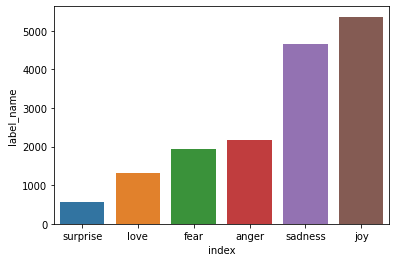

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

result = df['label_name'].value_counts(ascending=True).reset_index()
result
sns.barplot(data=result, x='index', y='label_name')

,text,label,label_name_map,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness,21


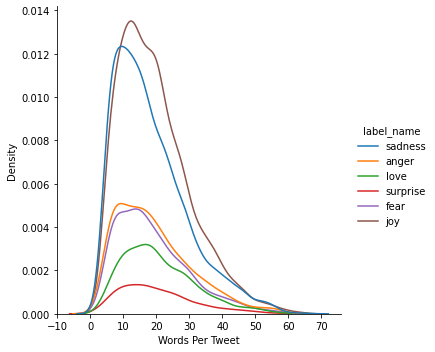

In [15]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
display(df.head(2))
sns.displot(df[['label_name', 'Words Per Tweet']], x='Words Per Tweet', hue='label_name', kind='kde')

In [16]:
text = "Tockenizing text is a core task of NLP."
tockenized_text = list(text)
print(tockenized_text)

['T', 'o', 'c', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [17]:
token2idx = {ch : idx for idx, ch in enumerate(sorted(set(tockenized_text)))}
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [36]:
input_ids = [token2idx[tocken] for tocken in tockenized_text]
print(tockenized_text)
print(input_ids)

['T', 'o', 'c', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
[5, 14, 7, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [20]:
categorical_df = pd.DataFrame(
    {'Name' : ['seoul', 'busan', 'suwon'],
     'Label' : [0,1,2]}
)
categorical_df

,Name,Label
0,seoul,0
1,busan,1
2,suwon,2


In [21]:
pd.get_dummies(categorical_df['Name'])

,busan,seoul,suwon
0,0,1,0
1,1,0,0
2,0,0,1


In [25]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

<ipython-input-25-5cbf6655c9d8>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids)


torch.Size([39, 20])

In [42]:
idx = 15
print(f"token : {tockenized_text[idx]}")
print(f"token : {input_ids[idx]}")
print(f"token : {one_hot_encodings[idx]}")
print(f"get_dummies : {pd.get_dummies(tockenized_text).iloc[idx]}")

token : t
token : 17
token : tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
get_dummies :      0
.    0
L    0
N    0
P    0
T    0
a    0
c    0
e    0
f    0
g    0
i    0
k    0
n    0
o    0
r    0
s    0
t    1
x    0
z    0
Name: 15, dtype: uint8


In [43]:
tockenized_text = text.split()
print(tockenized_text)

['Tockenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## Subword tockenization
